### <center>Fernandao Kwangtama Tekayadi</center>
#### <center>F1D022120</center>

# MODUL 4

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import cv2 as cv

[[253 253 253 ... 253 253 253]
 [253 253 253 ... 253 253 253]
 [253 253 253 ... 253 253 253]
 ...
 [253 253 253 ... 253 253 253]
 [253 253 253 ... 253 253 253]
 [253 253 253 ... 253 253 253]]


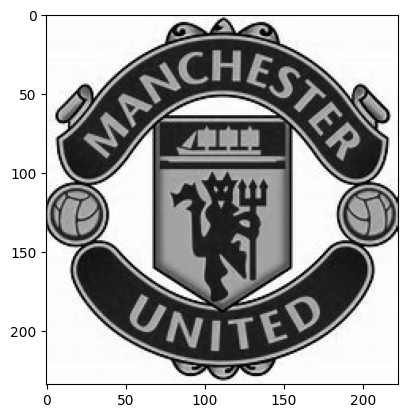

In [10]:
image = img.imread("../assets/manchester_united.jpeg")
gray_image = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
plt.imshow(gray_image,cmap='gray')
print(gray_image)

In [11]:
kernel_3x3 = np.full((3,3), 1/9) 
kernel_9x9 = np.full((9,9), 1/81) 

kernel_sharp = np.array([[1/9, 1/9, 1/9],
                         [1/9, 8/9, 1/9],
                         [1/9, 1/9, 1/9]])

kernel_smooth = np.array([[1/10, 1/10, 1/10],
                          [1/10, 1/5, 1/10],
                          [1/10, 1/10, 1/10]])

In [12]:
def mean(image, kernel):
    Tinggi, Lebar = image.shape
    Tinggi_1, Lebar_1 = kernel.shape
    Tengah = int((Tinggi_1 - 1)/2)
    Tengah_1 = int((Lebar_1 - 1)/2)
    atas = Tengah
    kanan = Lebar_1 - Tengah_1
    bawah = Tinggi_1 - Tengah
    kiri = Tengah_1
    image = np.pad(image, ((kiri, kanan), (atas, bawah)), mode='edge')

    hasil = np.zeros([Tinggi, Lebar])
    for i in range(Tinggi):
         for j in range(Lebar):
             temp = 0
             for k in range(Tinggi_1):
                 for l in range(Lebar_1):
                     temp += image[i+k, j+l] * kernel[k, l]
             hasil[i, j] = temp 
    return hasil


In [13]:
hasil_mean3x3 = mean(gray_image, kernel_3x3)
hasil_mean9x9 = mean(gray_image, kernel_9x9)

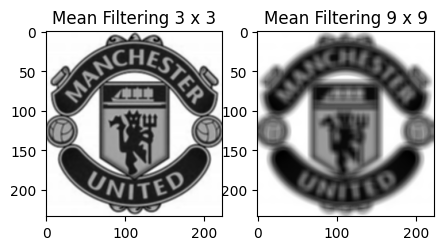

In [14]:
fig, ax= plt.subplots(1,2, figsize=(5,10))
ax[0].set_title('Mean Filtering 3 x 3')
ax[0].imshow(hasil_mean3x3, cmap='gray')
ax[1].set_title('Mean Filtering 9 x 9')
ax[1].imshow(hasil_mean9x9, cmap='gray')
